<a id="#"></a>   
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:90%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Introduction</p>

<div style='border: 3px solid none; background-color:#FDFBF8; padding:20px;'>
    <p style="font-family: Century Gothic; font-size: 18px; margin-top: 10px; margin-bottom: 10px;">
        <b>Machine Learning Course</b> <br><br>
        Prof.<br>
        Dr. Mohammad Zare<br><br>
        Developer:<br>
        <b>Danial Soleimany</b>.<br>Std NO. 140212459023   
    </p>
</div>


<a id="contents_tabel"></a>   
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:90%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Table Of Contents</p>

 <div style="border-radius:10px; padding: 15px; background-color: #FDFBF8; font-size:115%; text-align:left">

    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Create Dataset](#create)
* [Step 3 | Plot Decision Tree](#plot-dt)
* [Step 4 | Predict Test Data On Dataset](#pdt)   
* [Step 5 | Predict Test Data On Decision Tree](#pdt-plot)    
    
    
    

<a id="import"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Import Librares</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

<a id="create"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Create Dataset</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [6]:
data = {
    'Patient ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Sore Throat': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Fever': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
    'Swollen Glands': ['Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
    'Congestion': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'Headache': ['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
    'Diagnosis': ['Strep throat', 'Allergy', 'Cold', 'Strep throat', 'Cold', 'Allergy', 'Strep throat', 'Allergy', 'Cold', 'Cold']
}

df = pd.DataFrame(data)
df

,Patient ID,Sore Throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,1,Yes,Yes,Yes,Yes,Yes,Strep throat
1,2,No,No,No,Yes,Yes,Allergy
2,3,Yes,Yes,No,No,No,Cold
3,4,Yes,No,No,No,No,Strep throat
4,5,No,Yes,Yes,Yes,No,Cold
5,6,No,No,No,Yes,Yes,Allergy
6,7,No,No,Yes,No,No,Strep throat
7,8,Yes,No,No,Yes,Yes,Allergy
8,9,No,No,Yes,Yes,Yes,Cold
9,10,Yes,Yes,No,Yes,Yes,Cold


<a id="plot-dt"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Plot Decision Tree</p>
⬆️ [Tabel of Contents](#contents_tabel)

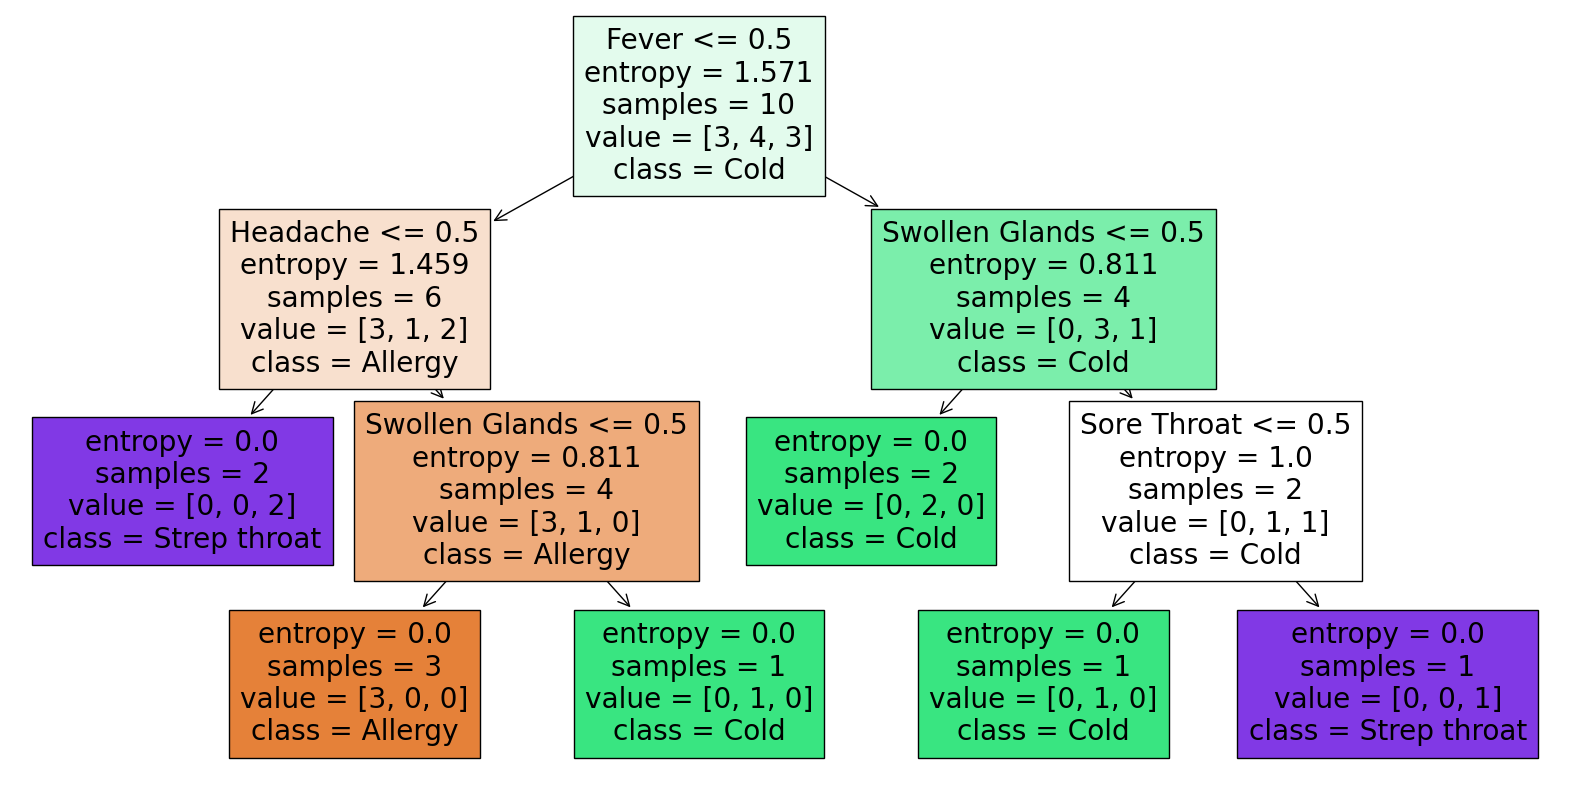

In [5]:
X = df[['Sore Throat', 'Fever', 'Swollen Glands', 'Congestion', 'Headache']]
y = df['Diagnosis']

le_X = LabelEncoder()
le_y = LabelEncoder()

for col in X.columns:
    X[col] = le_X.fit_transform(X[col])

y = le_y.fit_transform(y)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le_y.classes_, filled=True)
plt.show()

<a id="pdt"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Predict Test Data On Dataset</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
new_samples = {
    'Patient ID': [11, 12, 13],
    'Sore Throat': ['No', 'Yes', 'No'],
    'Fever': ['No', 'Yes', 'No'],
    'Swollen Glands': ['Yes', 'No', 'No'],
    'Congestion': ['Yes', 'No', 'No'],
    'Headache': ['Yes', 'Yes', 'Yes']
}

new_df = pd.DataFrame(new_samples)

for col in new_df.columns[1:]:
    new_df[col] = le_X.transform(new_df[col])

new_X = new_df[['Sore Throat', 'Fever', 'Swollen Glands', 'Congestion', 'Headache']]
predictions_encoded = clf.predict(new_X)
predictions = le_y.inverse_transform(predictions_encoded)

new_df['Diagnosis'] = predictions
new_df

,Patient ID,Sore Throat,Fever,Swollen Glands,Congestion,Headache,Diagnosis
0,11,0,0,1,1,1,Cold
1,12,1,1,0,0,1,Cold
2,13,0,0,0,0,1,Allergy


<a id="pdt-plot"></a>
# <p style="padding:10px;background-color:#B73839 ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:70%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Predict Test Data On Decision Tree</p>
⬆️ [Tabel of Contents](#contents_tabel)

The predicted diagnosis is: Cold


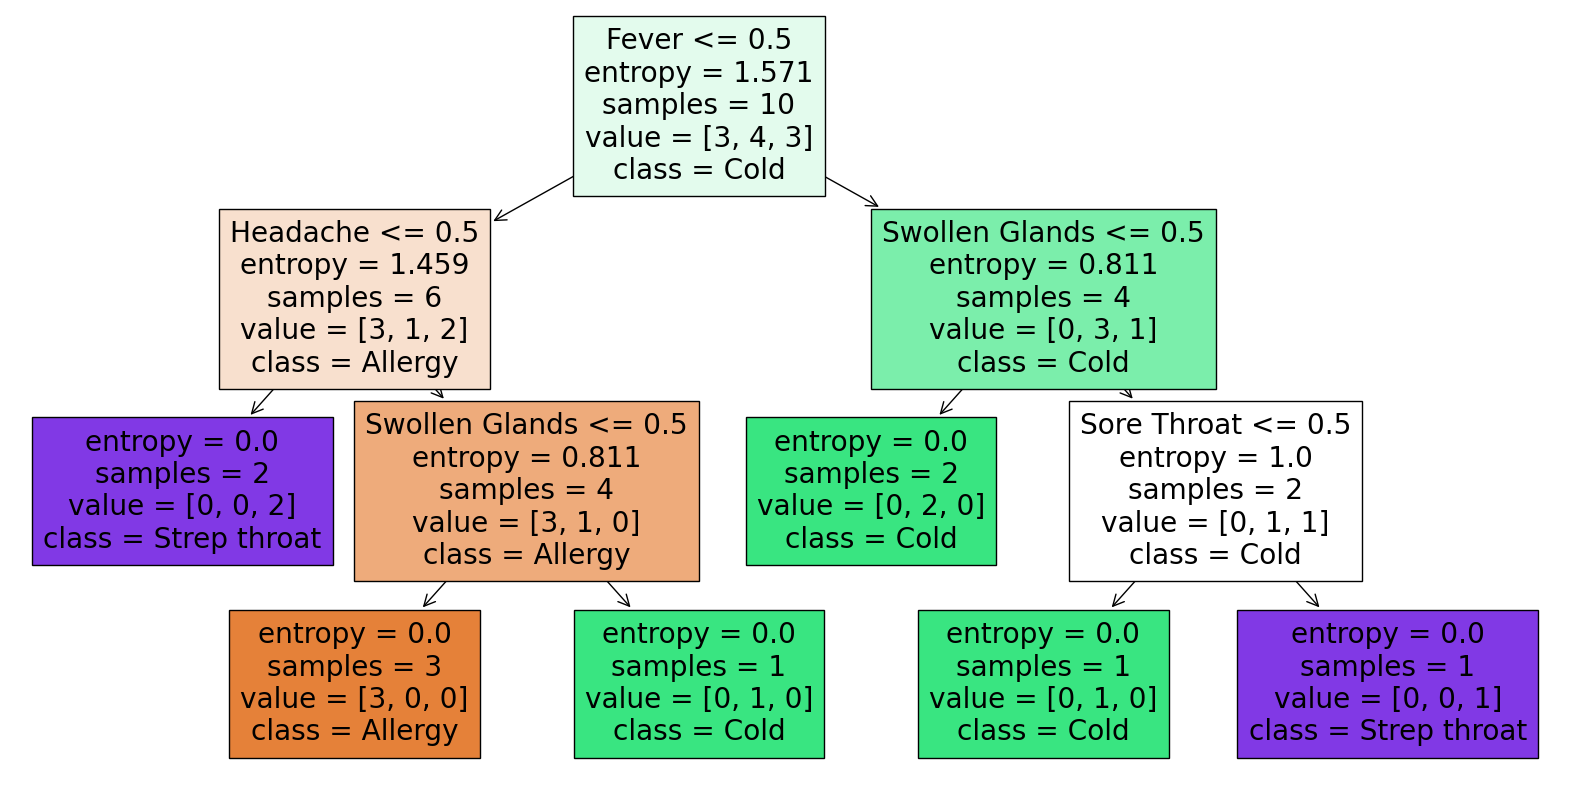

In [4]:
def diagnose_and_plot(patient_data):
    patient_df = pd.DataFrame([patient_data])
    
    for col in patient_df.columns:
        patient_df[col] = le_X.transform(patient_df[col])
    
    diagnosis_encoded = clf.predict(patient_df)
    diagnosis = le_y.inverse_transform(diagnosis_encoded)
    
    print(f"The predicted diagnosis is: {diagnosis[0]}")
    
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=le_y.classes_, filled=True)
    plt.show()

patient_data = {
    'Sore Throat': 'No',
    'Fever': 'No',
    'Swollen Glands': 'Yes',
    'Congestion': 'Yes',
    'Headache': 'Yes'
}

diagnose_and_plot(patient_data)

<a id="table"></a>
# <p style="padding:10px;background-color:#3E444F ;margin:0;color:#FDFBF8;font-family: Century Gothic;;font-size:60%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500;padding:15px;">Best Regards</p>